# Ford GoBike System Data Exploration
## by Amr Mohamed Abd Albadee

## Preliminary Wrangling



In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
#get Dataset
!wget https://video.udacity-data.com/topher/2020/October/5f91cf38_201902-fordgobike-tripdata/201902-fordgobike-tripdata.csv

--2021-06-29 20:39:02--  https://video.udacity-data.com/topher/2020/October/5f91cf38_201902-fordgobike-tripdata/201902-fordgobike-tripdata.csv
Resolving video.udacity-data.com (video.udacity-data.com)... 104.21.234.211, 104.21.234.210, 2606:4700:3038::6815:ead2, ...
Connecting to video.udacity-data.com (video.udacity-data.com)|104.21.234.211|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 39422395 (38M) [text/csv]
Saving to: ‘201902-fordgobike-tripdata.csv’

201902-fordgobike-t 100%[===================>]  37.60M  40.7MB/s    in 0.9s    

2021-06-29 20:39:03 (40.7 MB/s) - ‘201902-fordgobike-tripdata.csv’ saved [39422395/39422395]



In [3]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('/content/201902-fordgobike-tripdata.csv')

In [4]:
#data shape
print(df.shape)

(183412, 16)


In [5]:
#describtion & summary of data
print(df.info())
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [6]:
# first few entries of data
display(df.head(2))

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No


In [7]:
# get null values
df.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [8]:
# Unique values of stations
print(len(df.start_station_name.unique()))
print(len(df.end_station_name.unique()))

330
330


In [9]:
#counts of different Bikes IDs
df.bike_id.value_counts()

4794    191
4814    176
5014    174
4422    174
5175    173
       ... 
5647      1
3655      1
1194      1
3114      1
5891      1
Name: bike_id, Length: 4646, dtype: int64

In [10]:
#counts of different start stations
df.start_station_name.value_counts()

Market St at 10th St                                         3904
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3544
Berry St at 4th St                                           3052
Montgomery St BART Station (Market St at 2nd St)             2895
Powell St BART Station (Market St at 4th St)                 2760
                                                             ... 
Willow St at Vine St                                            9
Parker Ave at McAllister St                                     7
21st Ave at International Blvd                                  4
Palm St at Willow St                                            4
16th St Depot                                                   2
Name: start_station_name, Length: 329, dtype: int64

In [11]:
# Inspecting unique values of categorical column user type & bike_share_for_all_trip
print(df.user_type.unique())
print(df.bike_share_for_all_trip.unique())

['Customer' 'Subscriber']
['No' 'Yes']


In [12]:
# Drop unuseful columns
df.drop(labels=['start_station_id', 'start_station_name','end_station_id','end_station_name'], axis=1, inplace=True)

In [13]:
df.head(2)

,duration_sec,start_time,end_time,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,37.789625,-122.400811,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,37.791464,-122.391034,37.775880,-122.393170,2535,Customer,NaN,NaN,No


In [14]:
# Converting datetime columns to pandas datetime object.
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)
type(df.start_time[0])

pandas._libs.tslibs.timestamps.Timestamp

In [15]:
# Extract more useful columns from the datetime columns
df['duration_min']= (df['duration_sec']/60).round(0).astype(int)
df['duration_hour']= (df['duration_sec']/3600).round(0).astype(int)
df['start_time_month']= df.start_time.dt.month
df['start_time_day']= df.start_time.dt.day
df['start_time_day_name']= df['start_time'].dt.day_name()
df['start_time_hour']= df['start_time'].dt.hour
df.head(2)

,duration_sec,start_time,end_time,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,duration_hour,start_time_month,start_time_day,start_time_day_name,start_time_hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,37.789625,-122.400811,37.794231,-122.402923,4902,Customer,1984.0,Male,No,870,14,2,28,Thursday,17
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,37.791464,-122.391034,37.775880,-122.393170,2535,Customer,NaN,NaN,No,709,12,2,28,Thursday,18


In [16]:
# Drop duration_sec, start_time and end_time columns as they are no longer useful
df.drop(labels=['duration_sec', 'start_time', 'end_time'], axis=1, inplace=True)
df.head(2)

,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,duration_hour,start_time_month,start_time_day,start_time_day_name,start_time_hour
0,37.789625,-122.400811,37.794231,-122.402923,4902,Customer,1984.0,Male,No,870,14,2,28,Thursday,17
1,37.791464,-122.391034,37.775880,-122.393170,2535,Customer,NaN,NaN,No,709,12,2,28,Thursday,18


### What is the structure of your dataset?
The Ford GoBike System Dataset consists of 183412 bike rides that, contains the following 16 columns:

*   Trip Duration (seconds)
*   Start Time and Date
*   End Time and Date
*   Start Station ID
*   Start Station Name
*   Start Station Latitude
*   Start Station Longitude
*   End Station ID
*   End Station Name
*   End Station Latitude
*   End Station Longitude
*   Bike ID
*   User Type
*   User Birthday
*   User Gender
*   Bike share

### What is/are the main feature(s) of interest in your dataset?

> Number of Trips and Trip Duration

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> User Type and Bike share

## Univariate Exploration


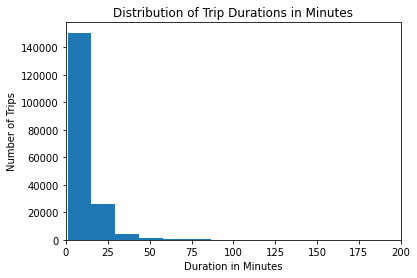

In [17]:
# Distribution of Trip Durations in minitues
# bins = np.arange(0, df['duration_min'].max()+10, 10)
plt.hist(data=df, x='duration_min', bins=100)
plt.title('Distribution of Trip Durations in Minutes')
plt.xlabel('Duration in Minutes')
plt.ylabel('Number of Trips')
plt.xlim([0, 200])
plt.show()

**Most trip durations are less than 70 mins long (between 0 - 30 mins).**


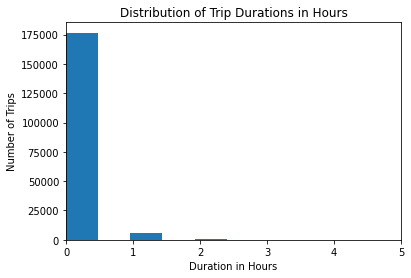

In [18]:
# Distribution of Trip Durations in hours
plt.hist(data=df, x='duration_hour', bins=50)
plt.title('Distribution of Trip Durations in Hours')
plt.xlabel('Duration in Hours')
plt.ylabel('Number of Trips')
plt.xlim([0, 5])
plt.show()

**most of the trip durations is less than 1 hour "consistent with last finding".**

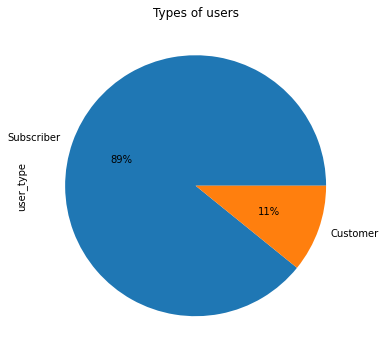

In [19]:
# plotting types of users 
user_type = df['user_type'].value_counts()
user_type.plot(x=user_type.index, y=user_type, kind='pie', figsize=(10,6), autopct='%1.0f%%');
plt.title('Types of users');

**Subscribers have more trips than regular customers.**



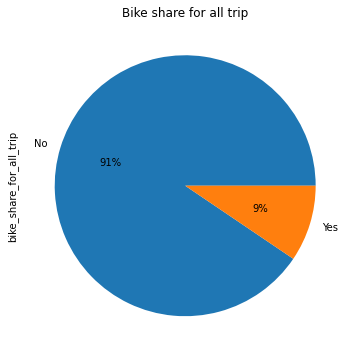

In [20]:
# plotting types of users 
user_type = df['bike_share_for_all_trip'].value_counts()
user_type.plot(x=user_type.index, y=user_type, kind='pie', figsize=(10,6), autopct='%1.0f%%');
plt.title('Bike share for all trip');

**Most Trips don't share bikes.**

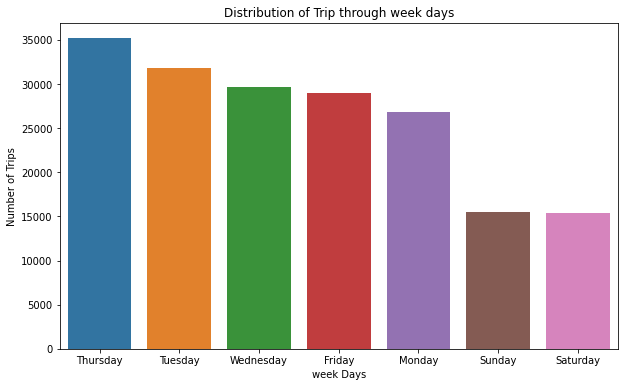

In [21]:
# Distribution of Trip through week days

base_color = sb.color_palette()[0]
start_time_day_name_order = df['start_time_day_name'].value_counts().index
plt.figure(figsize=[10, 6])
sb.countplot(data=df, x='start_time_day_name', order=start_time_day_name_order)
plt.xlabel('week Days')
plt.ylabel('Number of Trips')
plt.title('Distribution of Trip through week days');

**Most Trips are during Thursdays, we can say then that middle days has higher number of trips than holidays.**

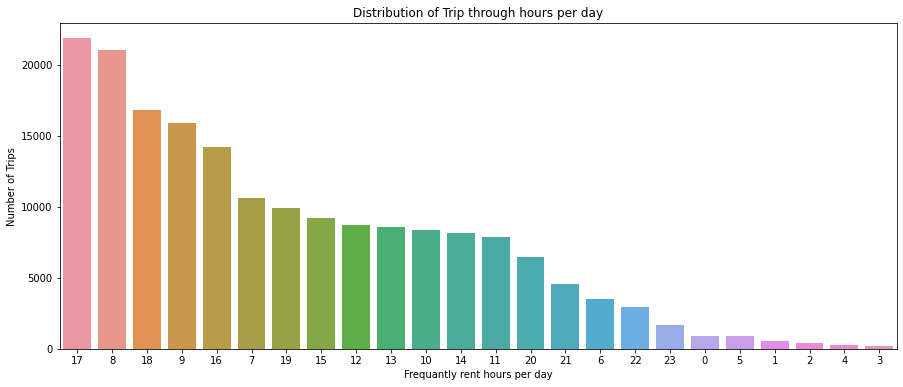

In [22]:
# Distribution of Trip through rent hours per day

base_color = sb.color_palette()[0]
start_time_hour_order = df['start_time_hour'].value_counts().index
plt.figure(figsize=[15, 6])
sb.countplot(data=df, x='start_time_hour', order=start_time_hour_order)
plt.xlabel('Frequantly rent hours per day')
plt.ylabel('Number of Trips')
plt.title('Distribution of Trip through hours per day');

**most rent hours are between 8 A.M and 8 P.M "20" , peak of rent hours is at 5 PM "17".**

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> **No there wasn't , although there was some null values in the dataset, I haven't used those feautres in my analysis.**

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> **I converted start times & end times to datetime format, so that I can extract Trip Durations in Minutes, seconds , also extracted trip days and months. it helped me plotting histograms and bar charts to show what is the distribution of trips among these factors.**

## Bivariate Exploration


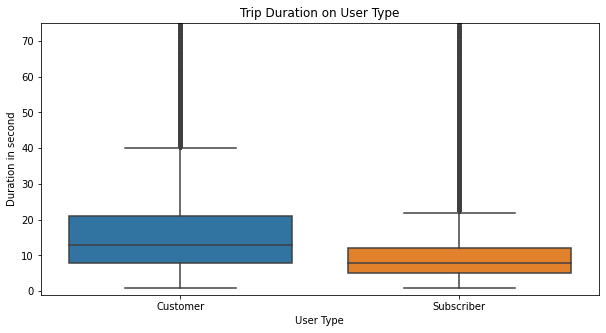

In [23]:
# Distribution of Duration on User Type

plt.figure(figsize = [10, 5])
sb.boxplot(data=df, x='user_type', y='duration_min')
plt.ylim([-1, 75])
plt.title('Trip Duration on User Type')
plt.xlabel('User Type')
plt.ylabel('Duration in second')
plt.show()

**Y-values were very widespread, so I limit y-axis to 70 mins**

**Customers Tend to ongo longer trips than subscribers**

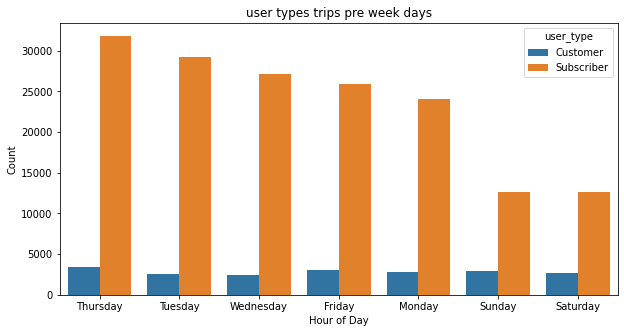

In [24]:
# Distribution of user types trips per week

plt.figure(figsize = [10, 5])
start_time_day_name_order = df['start_time_day_name'].value_counts().index
sb.countplot(data=df, x='start_time_day_name', hue='user_type', order= start_time_day_name_order);
plt.title('user types trips pre week days')
plt.xlabel('Hour of Day');
plt.ylabel('Count');

**Subscribers users tend to do more trips on all weekdays than Customers, and it makes sense, as subscribers already make 90% of the population in the dataset**

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> as Customers don't have the luxury to have bikes whenever they need, they tend to have longer runs. meanwhile subscribers tend to have bigger number of trips 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> not really !

## Multivariate Exploration


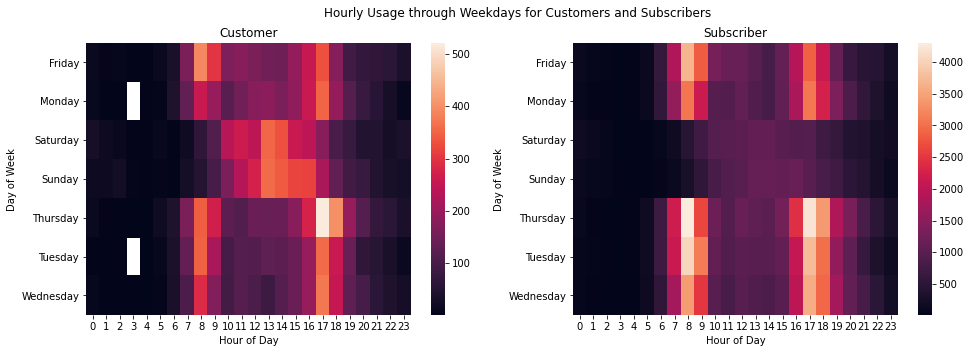

In [33]:
# Hourly Usage through Weekdays for Customers and Subscribers

plt.figure(figsize = [16, 5])
plt.suptitle('Hourly Usage through Weekdays for Customers and Subscribers')

plt.subplot(1, 2, 1)
daycounts = df[df['user_type'] == "Customer"].groupby(['start_time_day_name', 'start_time_hour']).size()
daycounts = daycounts.reset_index(name='index')
daycounts = daycounts.pivot(index='start_time_day_name', columns='start_time_hour', values='index')
sb.heatmap(daycounts);
plt.title('Customer');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');


plt.subplot(1, 2, 2)
counts = df[df['user_type'] == "Subscriber"].groupby(['start_time_day_name', 'start_time_hour']).size()
counts = counts.reset_index(name='index')
counts = counts.pivot(index='start_time_day_name', columns='start_time_hour', values='index')
sb.heatmap(counts);
plt.title('Subscriber');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');

*   subscribers have more trips on work days (Monday- Friday) peak at 5:00 PM.
*   customers have more trips on weekends than subscribers (peak at 1:00 PM)




In [ ]:
#remove NA values at genders
df = df[df['member_gender'].notna()]

In [ ]:
#know the value counts of males and females
df.member_gender.value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

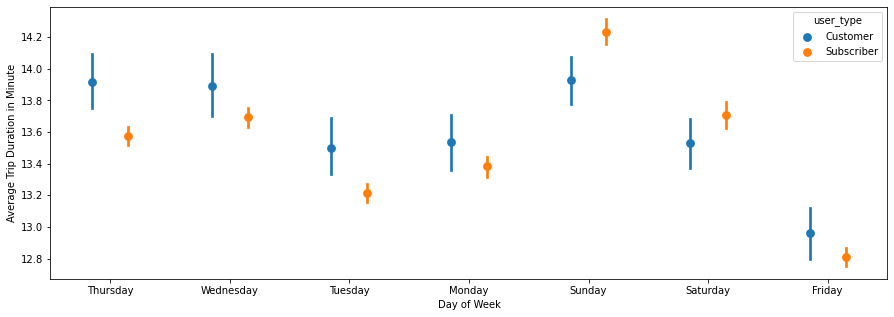

In [ ]:
# Average duration on Weekdays for Customers and Subscribers

plt.figure(figsize = [15, 5])
sb.pointplot(data=df, x='start_time_day_name', y='start_time_hour', hue='user_type', linestyles="" ,dodge=0.3,);
plt.xlabel('Day of Week');
plt.ylabel('Average Trip Duration in Minute');

**Customers average duration Trips are more than subscriber in all weekdays expect weekends(saturday and sunday). maximum difference is at Thursday and Tuesday.**

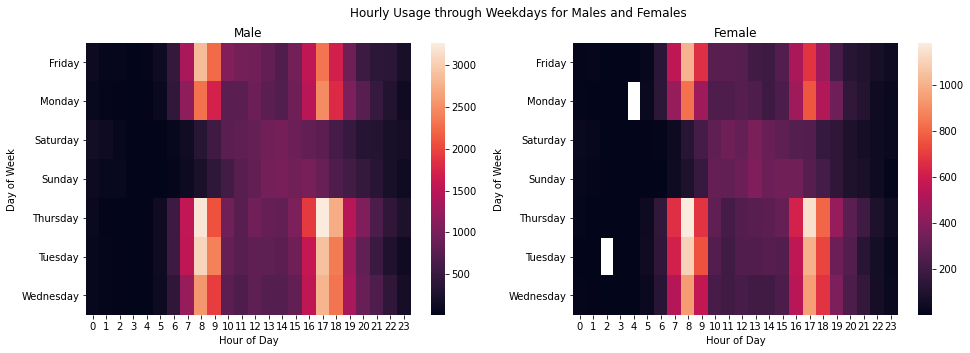

In [34]:
# Hourly Usage through Weekdays for Customers and Subscribers

plt.figure(figsize = [16, 5])
plt.suptitle('Hourly Usage through Weekdays for Males and Females')

plt.subplot(1, 2, 1)
daycounts = df[df['member_gender'] == "Male"].groupby(['start_time_day_name', 'start_time_hour']).size()
daycounts = daycounts.reset_index(name='index')
daycounts = daycounts.pivot(index='start_time_day_name', columns='start_time_hour', values='index')
sb.heatmap(daycounts);
plt.title('Male');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');


plt.subplot(1, 2, 2)
subscribers = df.query('member_gender == "Female"')
counts = subscribers.groupby(['start_time_day_name', 'start_time_hour']).size()
counts = counts.reset_index(name='index')
counts = counts.pivot(index='start_time_day_name', columns='start_time_hour', values='index')
sb.heatmap(counts);
plt.title('Female');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');

**Seems that two distributions don't differ so much, both men and women tends to have most of their trips during week days, peaks at 5:00 PM and 8:00 AM**



### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> subscribers are active more through weekdays, while customers are active more through weekends.
> customers aren't active through weekdays, but they tend to have longer runs in that time.
> subscribers aren't active through weekends, but they tend to have longer runs in that time.


### Were there any interesting or surprising interactions between features?

> We can conclude that there is an inverse relation between category(customers-subscribers) activeness or peak and their long runs

In [30]:
!jupyter nbconvert --to html /content/exploration_template.ipynb

[NbConvertApp] Converting notebook /content/exploration_template.ipynb to html
[NbConvertApp] Writing 550158 bytes to /content/exploration_template.html
